<a href="https://colab.research.google.com/github/Amarnath-sahni/ML-/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded =  files.upload();



Saving train.csv to train.csv


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Principal Component Analysis (PCA) in Machine Learning

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

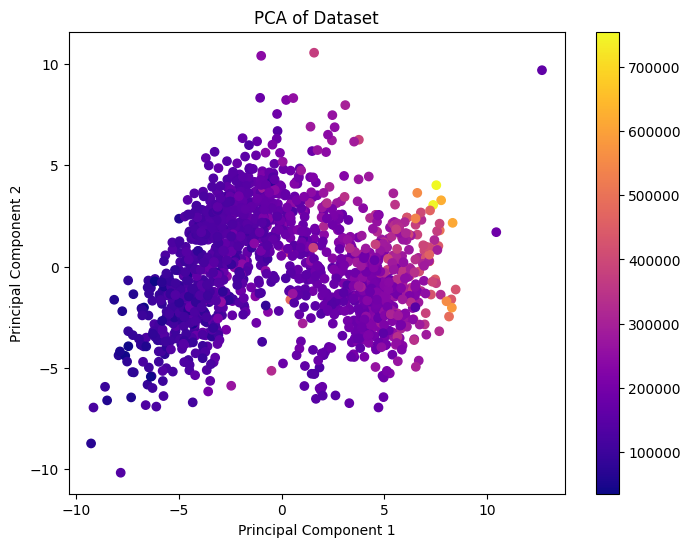

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your custom dataset
df = pd.read_csv('train.csv')

# Inspect the dataset
print(df.head())
print(df.isnull().sum())

# Handle missing values by filling with the mean for numeric columns only
# Get a list of numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Fill missing values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# If your dataset has a target variable (e.g., 'SalePrice'), separate it
X = df.drop(columns=['SalePrice'])  # Adjust column name accordingly
y = df['SalePrice']

# Apply One-Hot Encoding to categorical columns if necessary
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale the data
scaling = StandardScaler()
X_scaled = scaling.fit_transform(X_encoded)

# Apply PCA (reduce to 3 components)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Check shape and explained variance ratio
print(X_pca.shape)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Scatter plot of first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

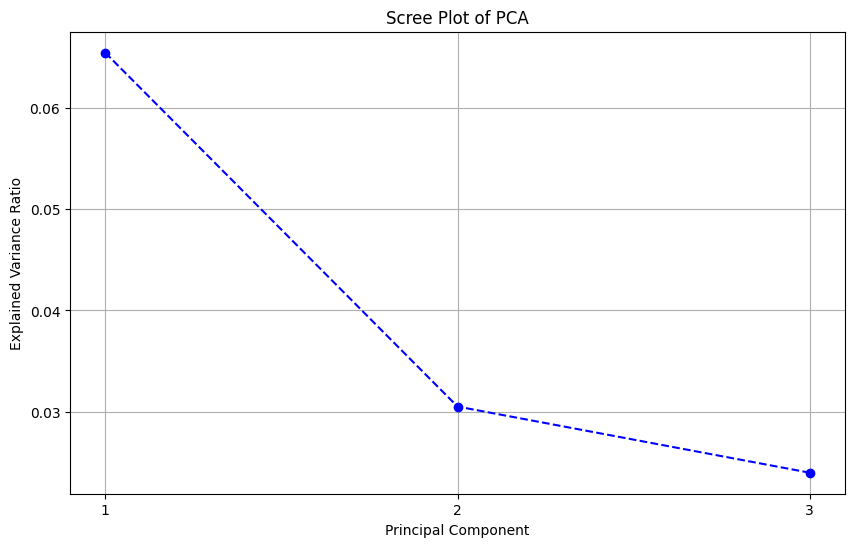

In [ ]:


# Extract the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a figure for the scree plot
plt.figure(figsize=(10, 6))

# Plot the explained variance ratio for each principal component
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')

# Add a title and labels to the plot
plt.title('Scree Plot of PCA')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Set x-ticks to be the numbers of the principal components
plt.xticks(range(1, len(explained_variance_ratio) + 1))

# Display a grid for easier visualization
plt.grid(True)

# Show the plot
plt.show()


# Linear Regression

<ipython-input-8-903d9c2e084f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Mean Squared Error: 7189094014.825961
R-squared: 0.06273946887816162


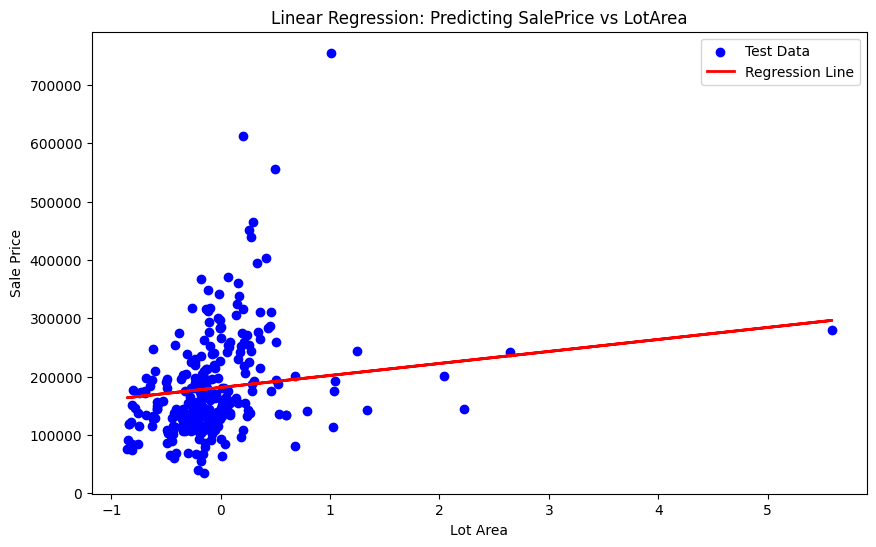

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming it has a column 'SalePrice')
df = pd.read_csv('train.csv')

# Let's say we want to predict 'SalePrice' from one feature 'LotArea' (you can choose another feature)
X = df[['LotArea']]  # Selecting a single feature for simplicity
y = df['SalePrice']  # Target variable

# Handle missing values if any
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize the data (this can help in some cases, especially when features have different scales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the regression line and the data points
plt.figure(figsize=(10, 6))

# Scatter plot of the original data points
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.title('Linear Regression: Predicting SalePrice vs LotArea')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.legend()

# Show the plot
plt.show()


# Multiple Linear Regression model

Mean Squared Error: 1852917614.0377376
R-squared: 0.7584304025685966


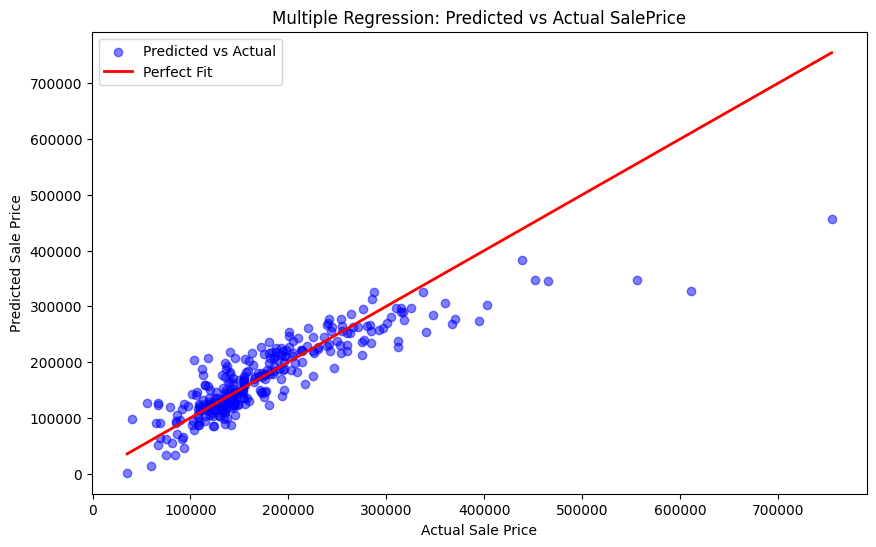

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('train.csv')

# Selecting multiple features (excluding categorical for now)
selected_features = ['LotArea', 'MSSubClass', 'LotFrontage', 'OverallQual', 'GrLivArea']
X = df[selected_features]
y = df['SalePrice']

# Handle missing values
X = X.fillna(X.mean())  # Fill missing values with column mean
y = y.fillna(y.mean())  # Fill missing values in target column

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for numerical stability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')

plt.title('Multiple Regression: Predicted vs Actual SalePrice')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.show()


# Polynomial Regression

<ipython-input-13-6e489e109ad1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Mean Squared Error: 1290917775.0854619
R-squared Score: 0.8316997556276202


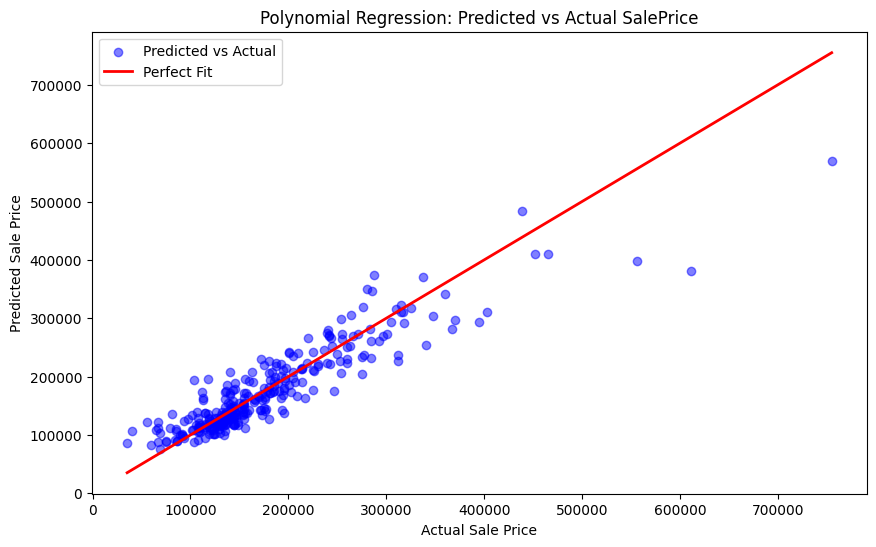

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('train.csv')

# Selecting relevant numerical features for prediction
selected_features = ['LotArea', 'MSSubClass', 'LotFrontage', 'OverallQual', 'GrLivArea']
X = df[selected_features]
y = df['SalePrice']

# Handle missing values by filling with mean
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert features into polynomial terms (degree=2 for quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the Polynomial Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualization: Actual vs Predicted SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')

plt.title('Polynomial Regression: Predicted vs Actual SalePrice')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.show()
